In [1]:
!pip install graphviz
!pip install pydot

In [2]:
import pandas as pd
df = pd.read_csv('../assets/data/engineered.txt')
print(df.shape)
df.head()

(3729, 20)


,player,season,completions,passatt,passyards,passtds,ints,sacks,sackyards,rushatt,rushyards,rushtds,fumbles,touches,cmp%,ny/a,ypc,rush-split,td:touch,to:touch
0,Eli Manning,2013,23,42,256,1,1,2.0,18.0,2,-2,0,1,46.0,0.547619,5.409091,-1.00,-0.008475,0.021739,0.043478
1,Peyton Manning,2013,32,51,400,4,0,1.0,3.0,0,0,0,0,52.0,0.627451,7.634615,0.00,0.000000,0.076923,0.000000
2,Cam Newton,2013,13,22,181,1,1,4.0,40.0,4,6,0,0,30.0,0.590909,5.423077,1.50,0.040816,0.033333,0.033333
3,Carson Palmer,2013,13,25,178,1,4,2.0,10.0,5,-3,0,0,32.0,0.520000,6.222222,-0.60,-0.018182,0.031250,0.125000
4,Philip Rivers,2013,19,29,201,1,1,1.0,5.0,4,-3,0,1,34.0,0.655172,6.533333,-0.75,-0.015544,0.029412,0.058824


In [3]:
df_z = pd.read_csv('../assets/data/years.txt')
zmsd = df_z.to_dict()
zmsd

{'year': {0: 2004,
  1: 2005,
  2: 2006,
  3: 2007,
  4: 2008,
  5: 2009,
  6: 2010,
  7: 2011,
  8: 2012,
  9: 2013,
  10: 2014,
  11: 2015,
  12: 2016,
  13: 2017,
  14: 2018,
  15: 2019},
 'touches-mean': {0: 31.86666666666667,
  1: 32.053892215568865,
  2: 33.75247524752475,
  3: 35.005,
  4: 36.620535714285715,
  5: 35.85616438356164,
  6: 37.831501831501825,
  7: 38.89310344827586,
  8: 39.1125,
  9: 39.67114093959732,
  10: 38.05923344947736,
  11: 39.79136690647482,
  12: 39.52066115702479,
  13: 38.72444444444445,
  14: 38.92462311557789,
  15: 40.072164948453604},
 'touches-std': {0: 10.502878070376422,
  1: 12.649709499512134,
  2: 11.620796198644435,
  3: 11.575618763104794,
  4: 9.223859083558118,
  5: 11.07611263702852,
  6: 9.925873995495063,
  7: 9.482032947252971,
  8: 10.329971307318887,
  9: 10.716388502301402,
  10: 10.771951571980221,
  11: 10.22630205501917,
  12: 10.382797113957553,
  13: 9.647565282132886,
  14: 10.659057263716157,
  15: 11.37362393020984},
 'cm

In [4]:
# z-scorify the stats by league year
# ...because QBs are basically getting better over time
stats = ['touches', 'cmp%', 'ny/a', 'ypc', 'rush-split', 'td:touch', 'to:touch']
def zscorify(row):
    yr = row['season']
    i = [k for k in zmsd['year'] if zmsd['year'][k] == yr][0]
    for s in stats:
        m = zmsd[f'{s}-mean'][i]
        sd = zmsd[f'{s}-std'][i]
        row[s] = (row[s] - m) / sd
    return row

df1 = df.apply(zscorify, axis=1)
df1.head()

,player,season,completions,passatt,passyards,passtds,ints,sacks,sackyards,rushatt,rushyards,rushtds,fumbles,touches,cmp%,ny/a,ypc,rush-split,td:touch,to:touch
0,Eli Manning,2013,23,42,256,1,1,2.0,18.0,2,-2,0,1,0.590578,-0.748473,-0.582619,-0.951009,-0.599933,-0.701024,0.260664
1,Peyton Manning,2013,32,51,400,4,0,1.0,3.0,0,0,0,0,1.150468,-0.000348,0.505696,-0.706494,-0.511240,0.930631,-1.058624
2,Cam Newton,2013,13,22,181,1,1,4.0,40.0,4,6,0,0,-0.902463,-0.342791,-0.575780,-0.339720,-0.084065,-0.358211,-0.047170
3,Carson Palmer,2013,13,25,178,1,4,2.0,10.0,5,-3,0,0,-0.715833,-1.007298,-0.184986,-0.853203,-0.701527,-0.419810,2.734329
4,Philip Rivers,2013,19,29,201,1,1,1.0,5.0,4,-3,0,1,-0.529203,0.259436,-0.032848,-0.889880,-0.673920,-0.474162,0.726295


In [5]:
df1.isnull().sum()

player         0
season         0
completions    0
passatt        0
passyards      0
passtds        0
ints           0
sacks          0
sackyards      0
rushatt        0
rushyards      0
rushtds        0
fumbles        0
touches        0
cmp%           0
ny/a           0
ypc            0
rush-split     0
td:touch       0
to:touch       0
dtype: int64

In [6]:
# split into train/test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df1,
                                     test_size=0.2,
                                     stratify=df1['player'],
                                     random_state=143)

labels = df1['player'].unique()
y_col = 'player'
X_cols = ['touches', 'cmp%', 'ny/a', 'ypc', 'rush-split', 'td:touch', 'to:touch']

X_train = df_train[X_cols]
X_test = df_test[X_cols]
y_train = df_train[y_col]
y_test = df_test[y_col]

labels

array(['Eli Manning', 'Peyton Manning', 'Cam Newton', 'Carson Palmer',
       'Philip Rivers', 'Ben Roethlisberger', 'Tony Romo', 'Matt Schaub',
       'Alex Smith', 'Matthew Stafford', 'Michael Vick', 'Russell Wilson',
       'Joe Flacco', 'Tom Brady', 'Drew Brees', 'Matt Cassel',
       'Jay Cutler', 'Andy Dalton', 'Ryan Fitzpatrick', 'Matt Ryan',
       'Matt Hasselbeck', 'Aaron Rodgers', 'Brett Favre'], dtype=object)

In [7]:
# use a random forest classifier
# use a randomized search for hyperparameter stuuf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(
    RandomForestClassifier(
        n_estimators=100,
        n_jobs=1,
        random_state=143
    ),
    param_distributions=dict(
        max_depth=[3,4,7,8,9,None],
        min_samples_split=[2,20],
        max_features=[3,4,6]
    ),
    n_iter=20,
    cv=5,
    random_state=143
)

# warning: takes time
search.fit(X_train, y_train)
search.best_params_

{'min_samples_split': 20, 'max_features': 4, 'max_depth': 7}

In [7]:
# build the model
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    min_samples_split=20,
    max_features=4,
    max_depth=7,
    random_state=143
)
model_rfc.fit(X_train, y_train)

# not great subset accuracy, but we beat the baseline
model_rfc.score(X_test, y_test)

0.14209115281501342

In [8]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=labels)
y_scores = model_rfc.predict_proba(X_test)

# ...aand, roc_auc is basically nil
# ...and worse than baseline...
roc_auc_score(y_test_bin, y_scores)

0.49066882525669486

In [9]:
list(zip(model_rfc.classes_, y_scores[0]))

[('Aaron Rodgers', 0.04336993214844813),
 ('Alex Smith', 0.0246260860519243),
 ('Andy Dalton', 0.03933376866919694),
 ('Ben Roethlisberger', 0.06649305799741173),
 ('Brett Favre', 0.018968145419719352),
 ('Cam Newton', 0.009116827188283888),
 ('Carson Palmer', 0.03734927600246092),
 ('Drew Brees', 0.1250540258295282),
 ('Eli Manning', 0.044194651050555055),
 ('Jay Cutler', 0.040801613199806096),
 ('Joe Flacco', 0.039188334449411194),
 ('Matt Cassel', 0.015754656798853888),
 ('Matt Hasselbeck', 0.028735223741597822),
 ('Matt Ryan', 0.0797232660159583),
 ('Matt Schaub', 0.02354539873148426),
 ('Matthew Stafford', 0.037262500815336184),
 ('Michael Vick', 0.00372680289335124),
 ('Peyton Manning', 0.04043022654923144),
 ('Philip Rivers', 0.06673468153966394),
 ('Russell Wilson', 0.028043711430174062),
 ('Ryan Fitzpatrick', 0.03134150567196341),
 ('Tom Brady', 0.12408562479393678),
 ('Tony Romo', 0.0321206830117027)]

In [10]:
# save the model
import pickle
pickle.dump(model_rfc, open('../assets/models/randomforest.pkl', 'wb'))

In [11]:
# save the z-score data
df1.to_csv('../assets/data/standardized.txt', index=False)

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


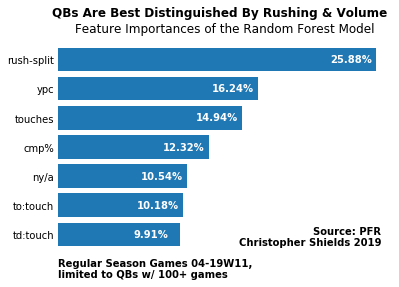

In [12]:
# plot model's feature importances
import matplotlib.pyplot as plt

fis = list(zip(stats, model_rfc.feature_importances_))
fis.sort(key=lambda x: x[1])

x = list(map(lambda x: x[0], fis))
y = list(map(lambda x: x[1], fis))
plt.barh(x, y)

for i in range(len(y)):
    xx = y[i] - 0.0375
    yy = i - 0.1
    lbl = f'{y[i]*100:.2f}%'
    plt.text(xx, yy, lbl, fontweight='bold', color='white')

plt.suptitle('QBs Are Best Distinguished By Rushing & Volume',
             fontweight='bold',
             y=0.99)
plt.title('Feature Importances of the Random Forest Model')
ax = plt.axes()
ax.tick_params(axis='both', length=0)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks([])
plt.text(0, -1.5,
         'Regular Season Games 04-19W11,\nlimited to QBs w/ 100+ games',
         fontweight='bold')
plt.text(0.2075, 0, 'Source: PFR', fontweight='bold')
plt.text(0.147, -0.4, 'Christopher Shields 2019', fontweight='bold')
plt.savefig('../assets/rfc-fis.png')
plt.show()

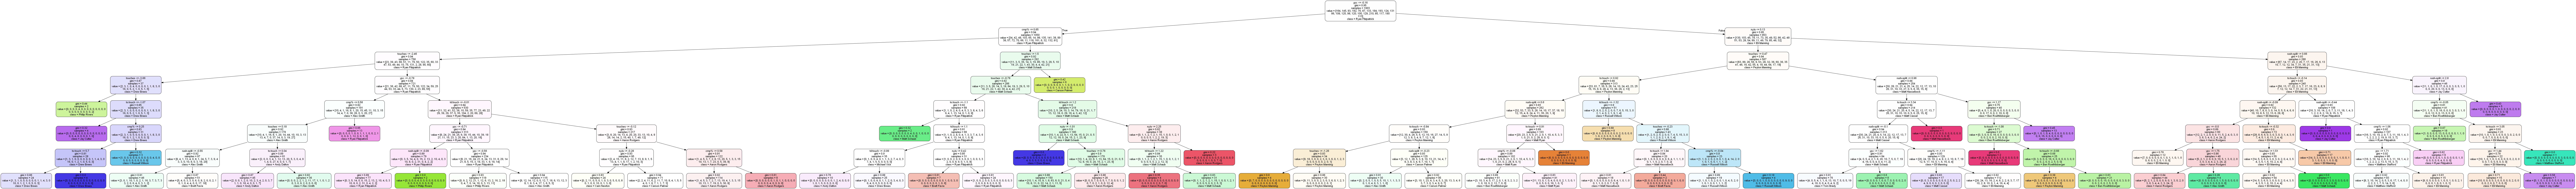

In [15]:
# show example tree from model
from sklearn.tree import export_graphviz
import pydot
from subprocess import call
from IPython.display import Image

export_graphviz(model_rfc.estimators_[-4],
                out_file='rf-tree.dot',
                feature_names=stats,
                class_names=labels,
                rounded=True,
                proportion=False,
                precision=2,
                filled=True)

(graph,) = pydot.graph_from_dot_file('rf-tree.dot')
graph.write_png('../assets/rf-tree.png')

Image(filename='../assets/rf-tree.png')